In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('titanic_dataset.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
# List all columns in the dataset
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.3+ KB


In [5]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
# check if there are unknown/empty values and count
(df.isnull() | df.empty | df.isna()).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
def showPercentageNan(colName, dtFrame):
    perc = (dtFrame[colName].isnull().sum() / dtFrame.shape[0])
    print(f"Percent of missing ''{colName}'' records is {round(perc * 100,3)} %")

In [9]:
colNan = [ 
    "fare",
    "cabin",
    "embarked",
    "boat",
    "body",
    "home.dest"
]

for col in colNan:
    showPercentageNan(col, df)

Percent of missing ''fare'' records is 0.076 %
Percent of missing ''cabin'' records is 77.464 %
Percent of missing ''embarked'' records is 0.153 %
Percent of missing ''boat'' records is 62.872 %
Percent of missing ''body'' records is 90.756 %
Percent of missing ''home.dest'' records is 43.086 %


In [10]:
# drop unnecessary columns
df.drop(["cabin","boat","body","home.dest"], axis=1, inplace=True)

In [11]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [12]:
df["fare"].fillna(value = df["fare"].mean(), inplace=True)
df["embarked"].fillna(df["embarked"].value_counts().idxmax(), inplace=True)
df["age"].fillna(value = df["age"].mean(), inplace=True)

In [13]:
nrAgeNaN = df["age"].isna().sum()
nrFareNaN = df["fare"].isna().sum()
nrEmbarkedNaN = df["embarked"].isna().sum()
print(f"Now we have {nrAgeNaN} missing values on age column!")
print(f"Now we have {nrFareNaN} missing values on fare column!")
print(f"Now we have {nrEmbarkedNaN} missing values on embarked column!")

Now we have 0 missing values on age column!
Now we have 0 missing values on fare column!
Now we have 0 missing values on embarked column!


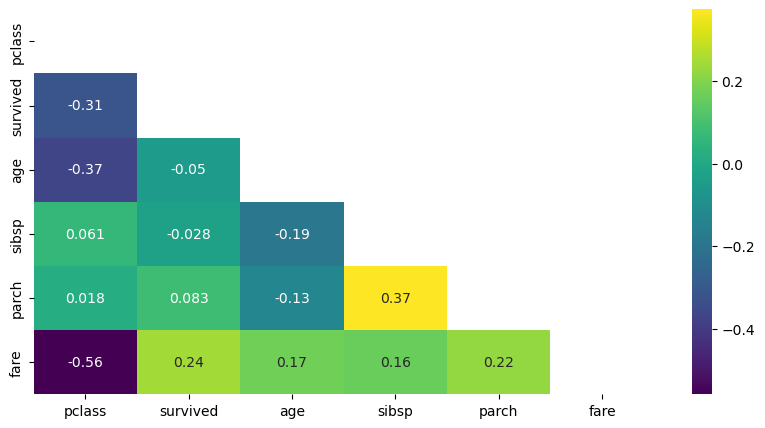

In [14]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))
sns.heatmap(df.corr(numeric_only = True), cbar = True, annot = True, cmap="viridis", mask = mask);

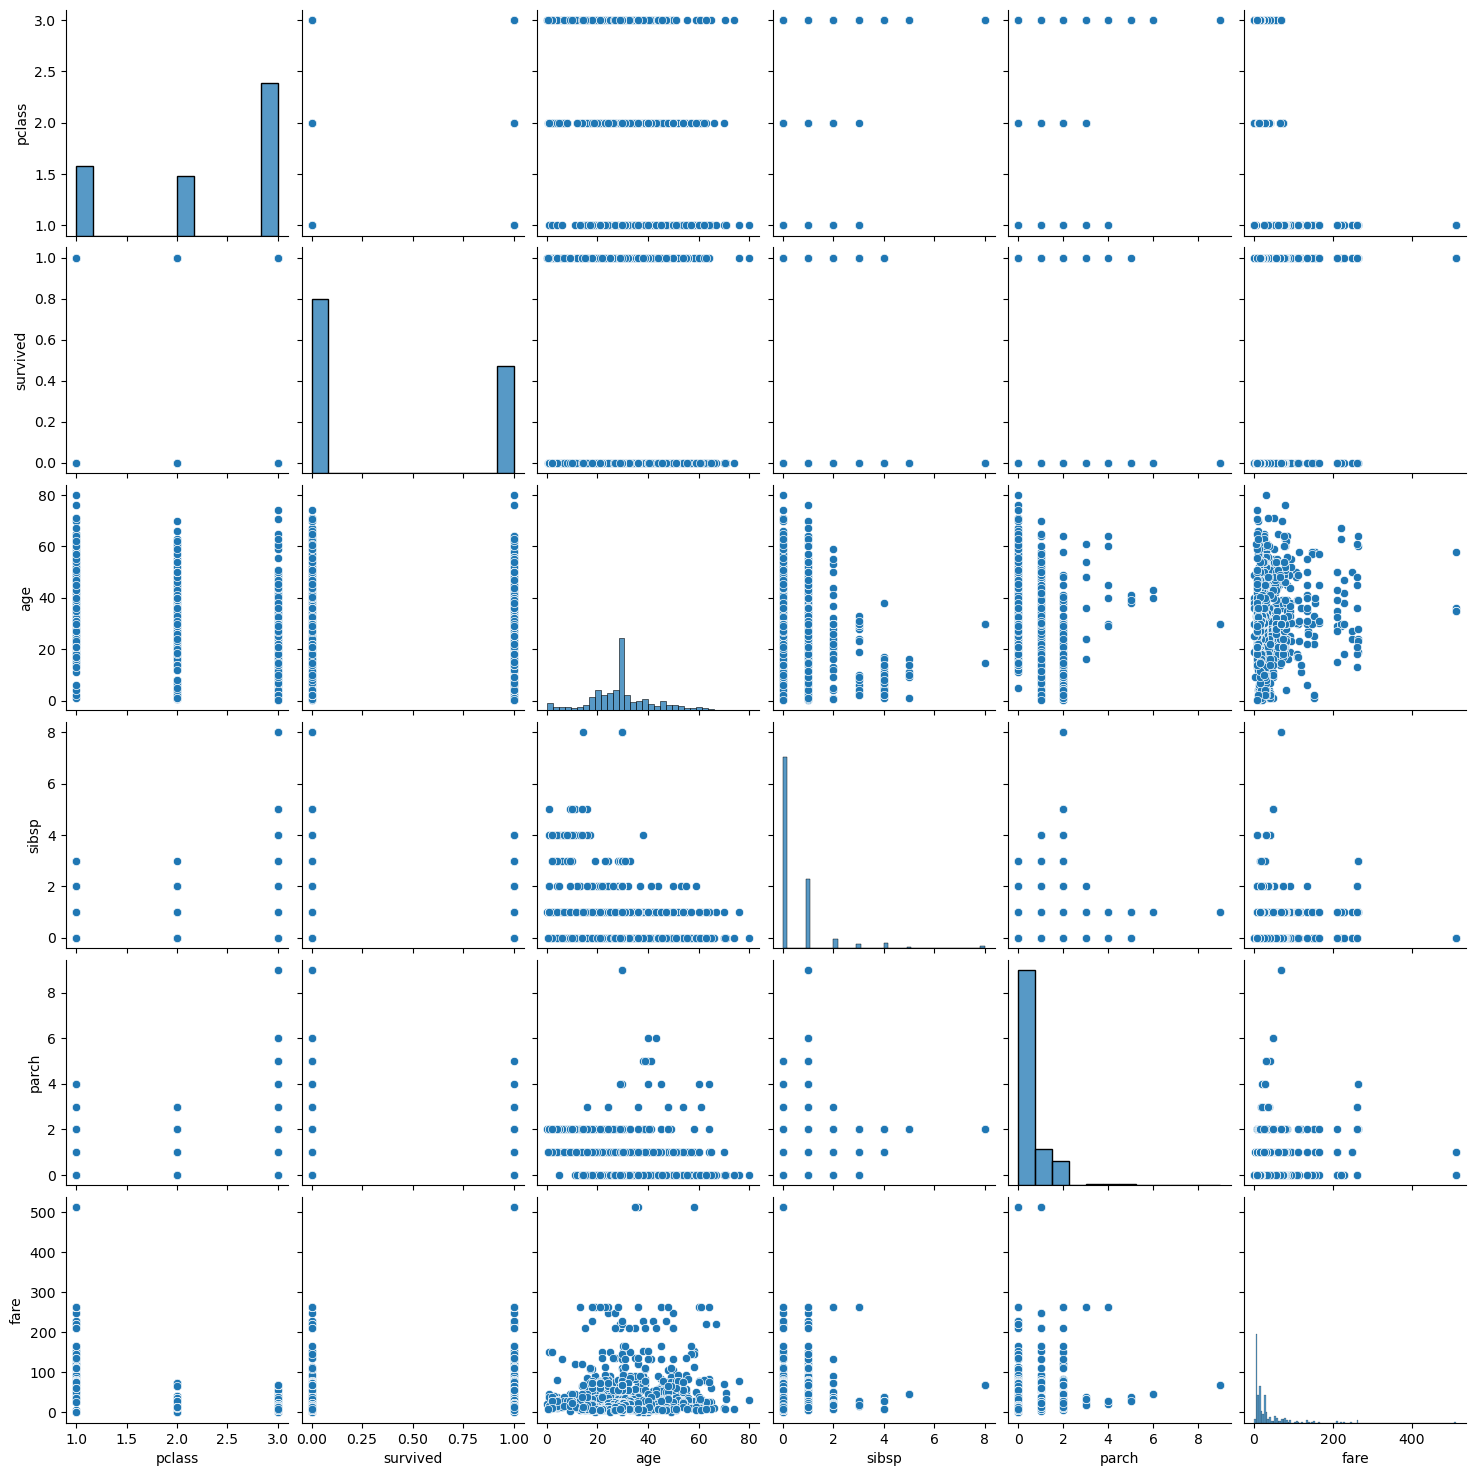

In [15]:
# Feature Engineering
#Plot pairwise

sns.pairplot(df)

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

df["name"] = labelencoder_X.fit_transform(df["name"])
df["embarked"] = labelencoder_X.fit_transform(df["embarked"])
df["ticket"] = df["ticket"].astype(str)
df["ticket"] = labelencoder_X.fit_transform(df["ticket"])

In [17]:
from sklearn.preprocessing import OneHotEncoder

result = OneHotEncoder().fit_transform(df["sex"].values.reshape(-1, 1)).toarray()
df[["Female", "Male"]] = pd.DataFrame(result, index = df.index)
df.drop(["sex"], axis=1, inplace=True)

In [18]:
df

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,Female,Male
0,1.0,1.0,21,29.000000,0.0,0.0,187,211.3375,2,1.0,0.0
1,1.0,1.0,23,0.916700,1.0,2.0,49,151.5500,2,0.0,1.0
2,1.0,0.0,24,2.000000,1.0,2.0,49,151.5500,2,1.0,0.0
3,1.0,0.0,25,30.000000,1.0,2.0,49,151.5500,2,0.0,1.0
4,1.0,0.0,26,25.000000,1.0,2.0,49,151.5500,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,1291,14.500000,1.0,0.0,259,14.4542,0,1.0,0.0
1305,3.0,0.0,1292,29.881135,1.0,0.0,259,14.4542,0,1.0,0.0
1306,3.0,0.0,1293,26.500000,0.0,0.0,250,7.2250,0,0.0,1.0
1307,3.0,0.0,1294,27.000000,0.0,0.0,264,7.2250,0,0.0,1.0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
p_predict = model.predict(X_test)

print("The accuracy is", round(accuracy_score(p_predict, y_test) * 100,2))

The accuracy is 77.86


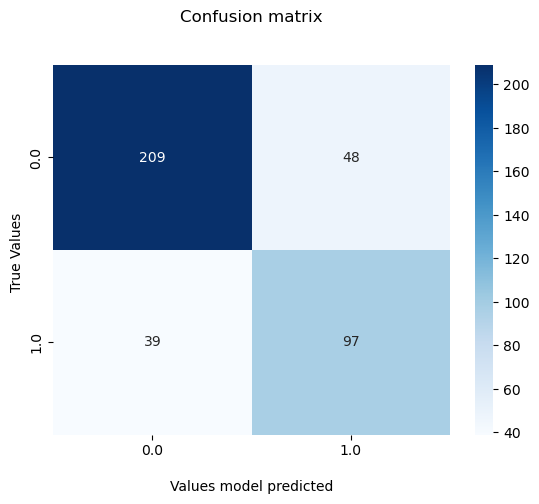

Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       257
         1.0       0.67      0.71      0.69       136

    accuracy                           0.78       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport}")

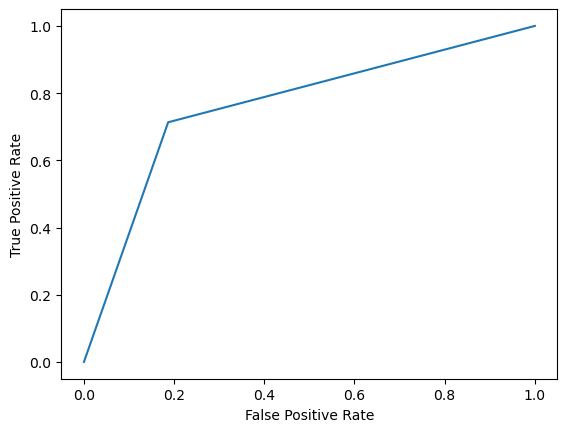

In [21]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, p_predict)

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()